**IMORTING LIBRARIES AND SETTING UP THE ENVIRONMENT**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings

warnings.filterwarnings('ignore')

**DATA LOADING AND CLEANING**

In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/Raw Data.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1977 entries, 0 to 1976
Data columns (total 39 columns):
 #   Column                                                                                                                                                                 Non-Null Count  Dtype 
---  ------                                                                                                                                                                 --------------  ----- 
 0   1. Age                                                                                                                                                                 1977 non-null   object
 1   2. Gender                                                                                                                                                              1977 non-null   object
 2   3. University                                                                                               

In [ ]:
# Remove unnecessary columns by index
drop_indices = np.r_[7:14, 16:26, 28:37]
df = df.drop(df.columns[drop_indices], axis=1)

In [ ]:
# Clean up column names
df.columns = df.columns.str.replace(r'^\d+\.\s*', '', regex=True)
df = df.rename(columns={'Did you receive a waiver or scholarship at your university?': 'Waiver/Scholarship'})

 **DATA VISUALIZATION**

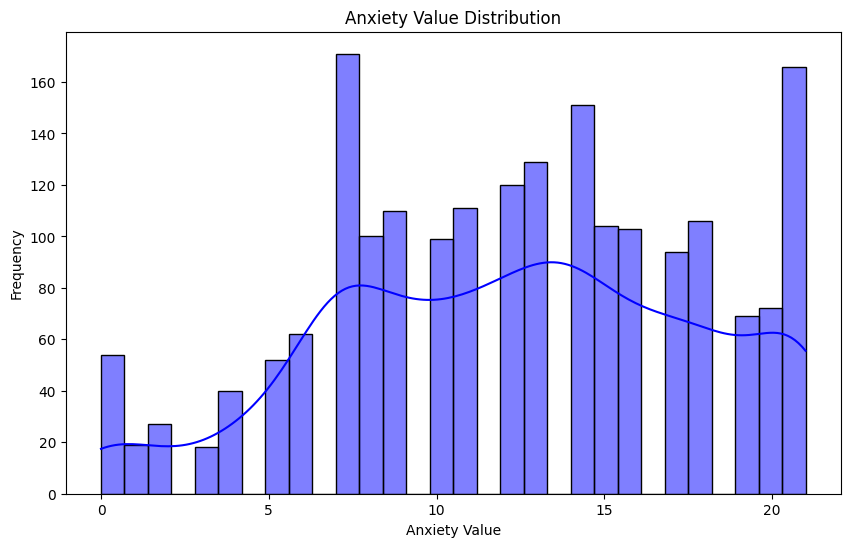

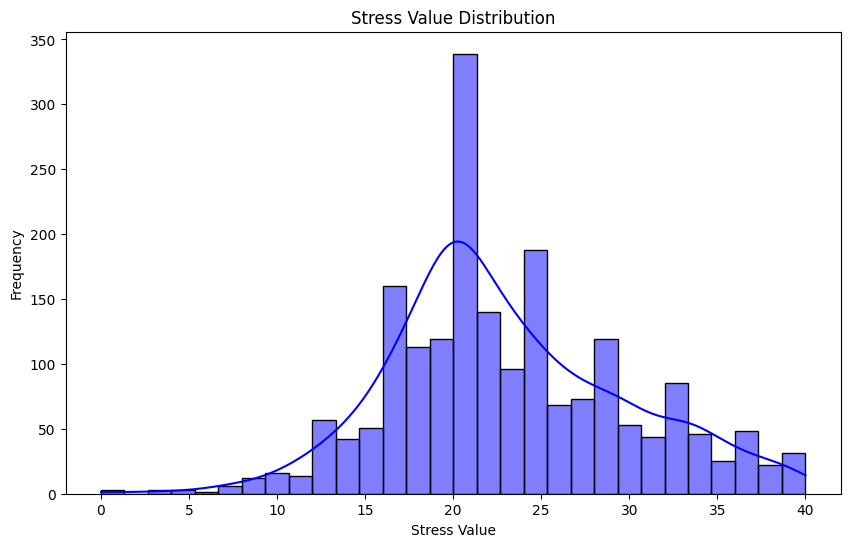

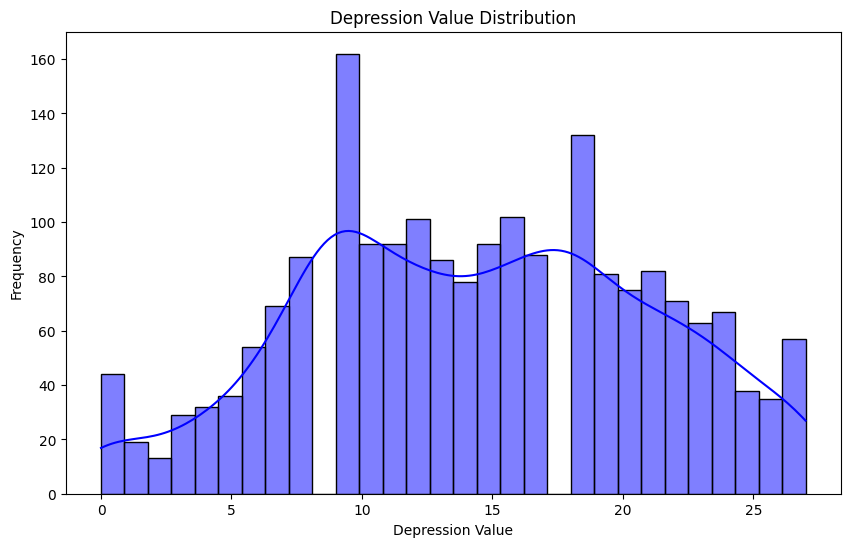

In [ ]:
# Histograms for Anxiety, Stress, and Depression Values
for value_col in ['Anxiety Value', 'Stress Value', 'Depression Value']:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[value_col], bins=30, kde=True, color='blue')
    plt.title(f'{value_col} Distribution')
    plt.xlabel(value_col)
    plt.ylabel('Frequency')
    plt.show()

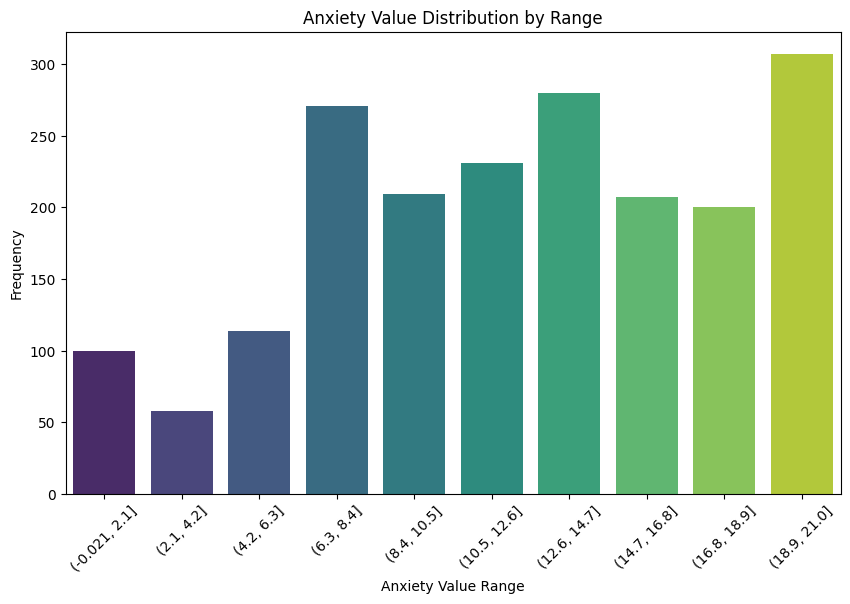

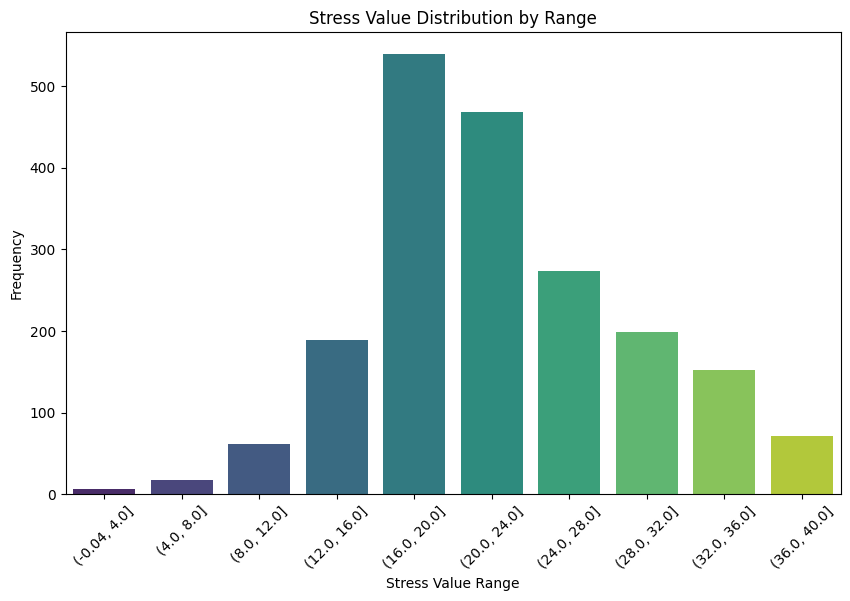

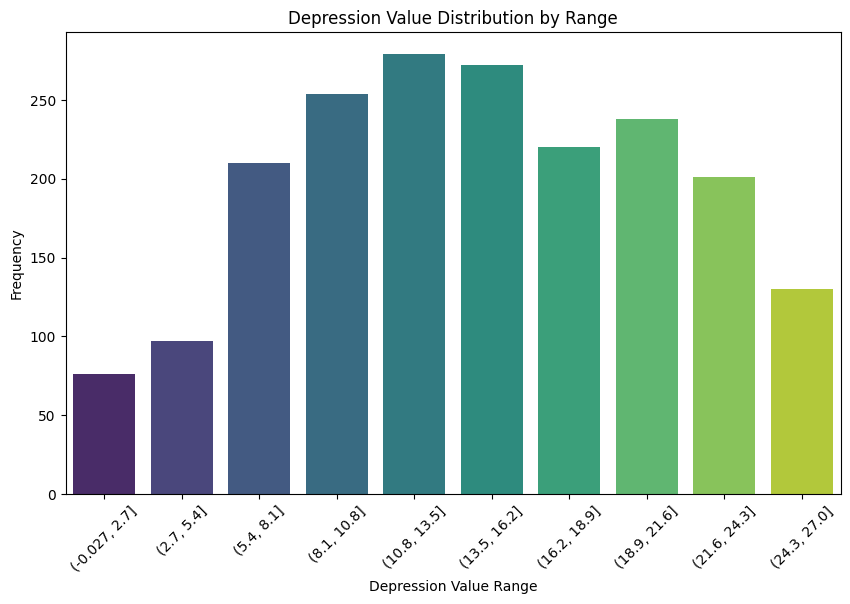

In [ ]:
# Bar charts for distinct value ranges of Anxiety, Stress, and Depression
for value_col in ['Anxiety Value', 'Stress Value', 'Depression Value']:
    plt.figure(figsize=(10, 6))
    value_counts = pd.cut(df[value_col], bins=10).value_counts().sort_index()
    sns.barplot(x=value_counts.index.astype(str), y=value_counts.values, palette='viridis')
    plt.title(f'{value_col} Distribution by Range')
    plt.xlabel(f'{value_col} Range')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

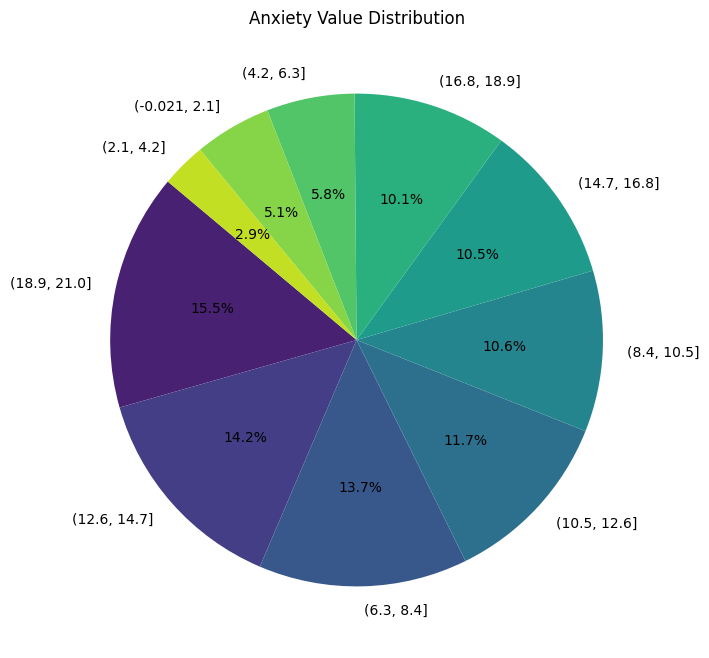

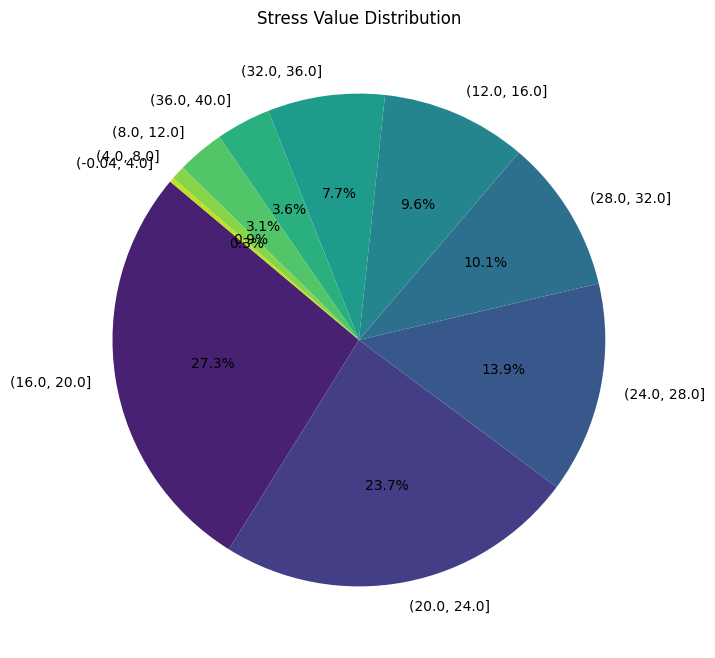

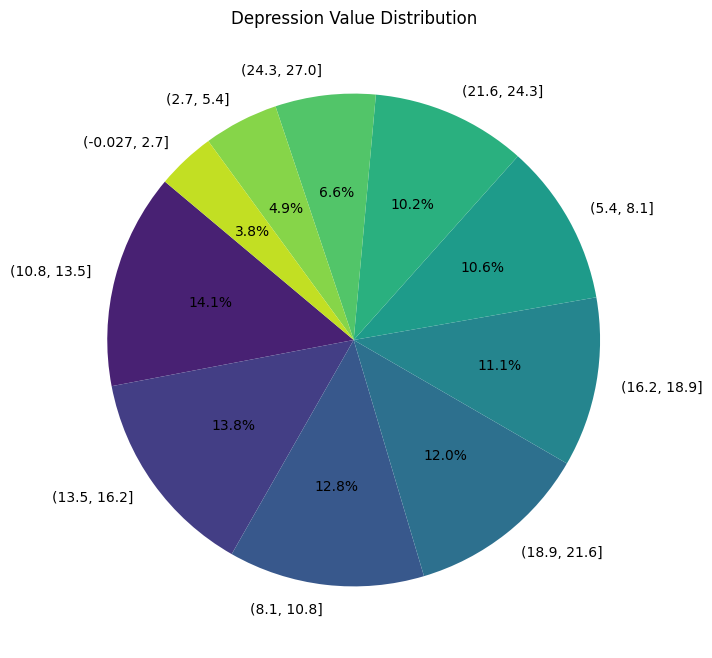

In [ ]:
# Pie charts for Anxiety, Stress, and Depression Values
for value_col in ['Anxiety Value', 'Stress Value', 'Depression Value']:
    plt.figure(figsize=(8, 8))
    value_counts = pd.cut(df[value_col], bins=10).value_counts()
    plt.pie(value_counts, labels=value_counts.index.astype(str), autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(value_counts)))
    plt.title(f'{value_col} Distribution')
    plt.show()


Anxiety Label vs Features Analysis



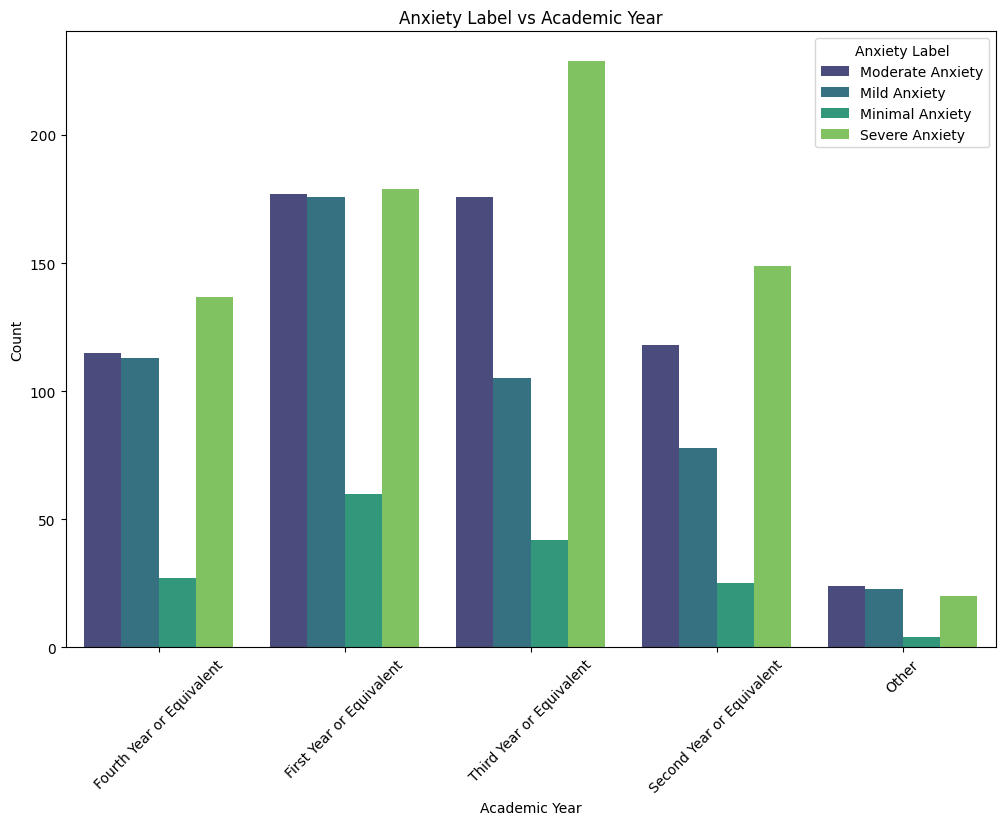

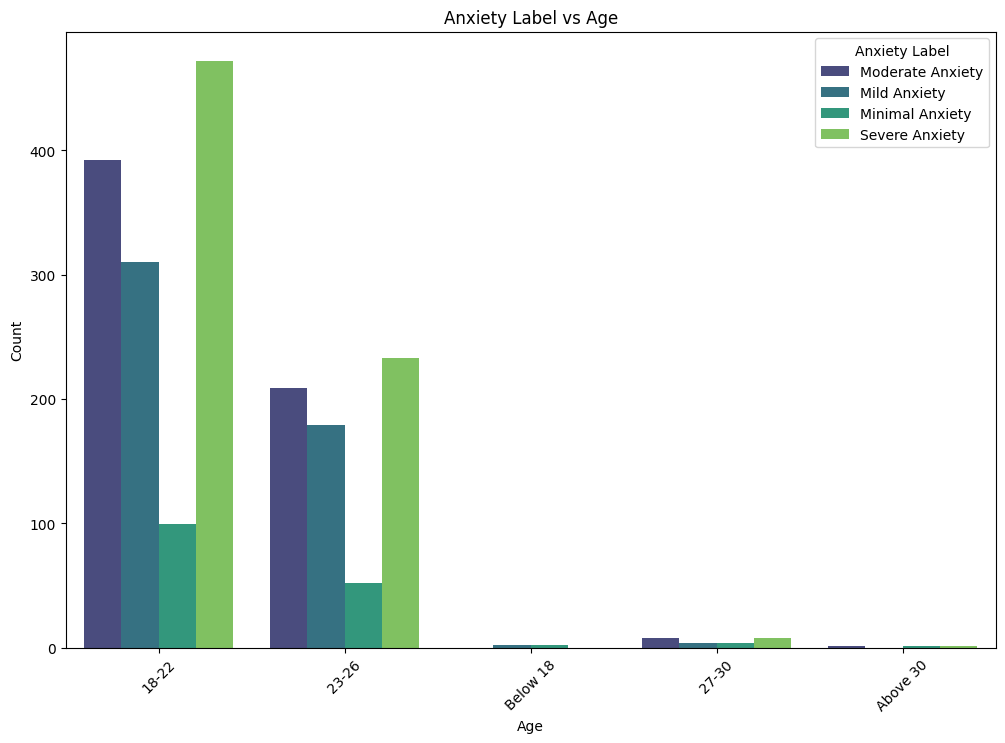

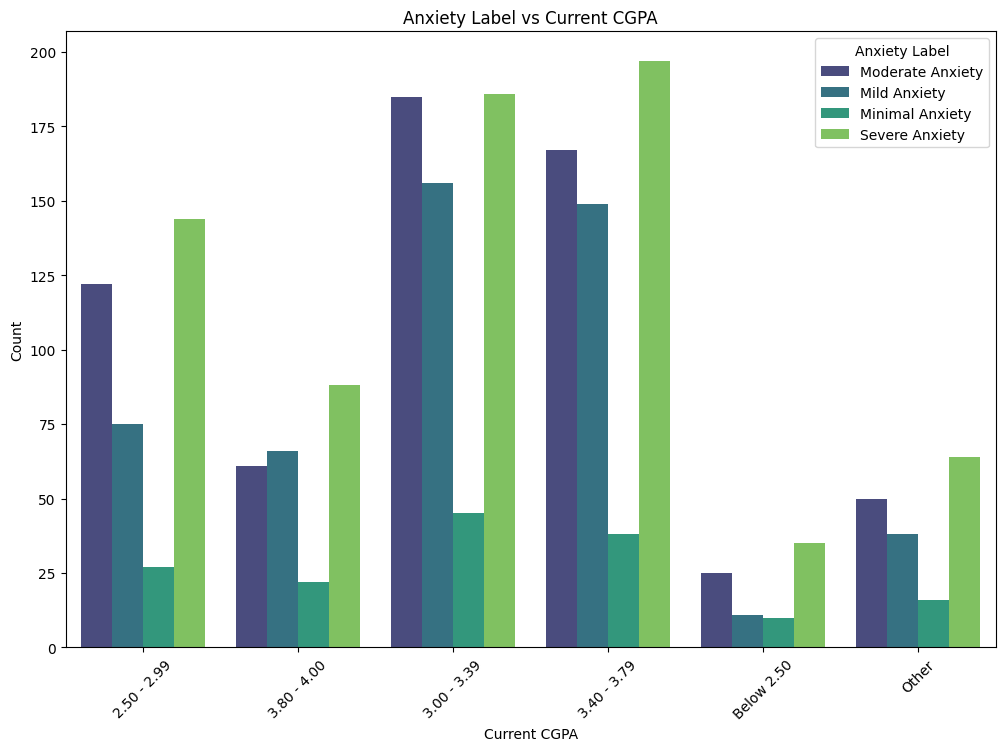

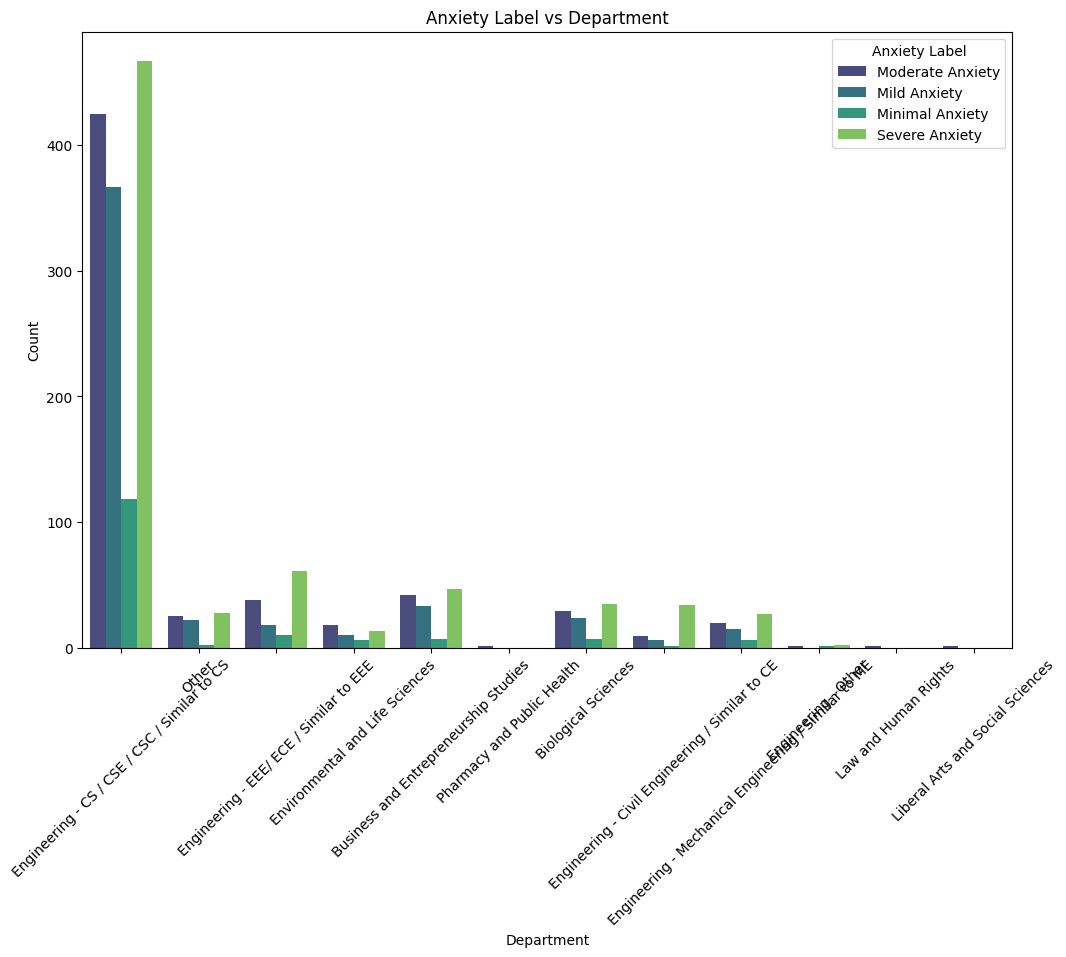

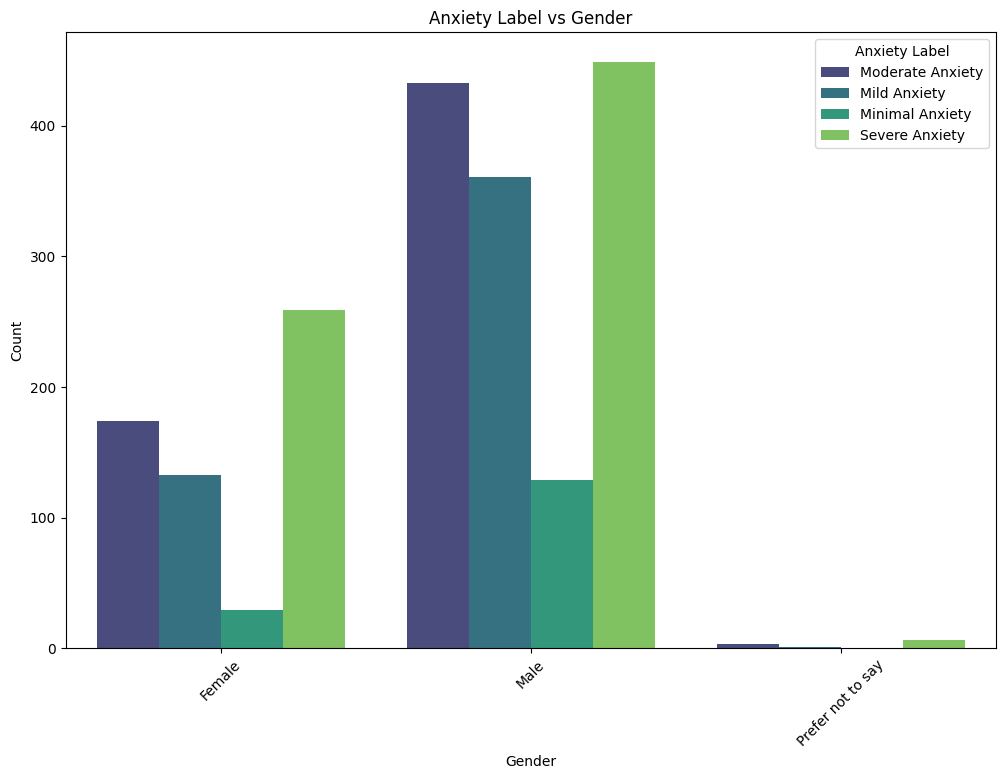

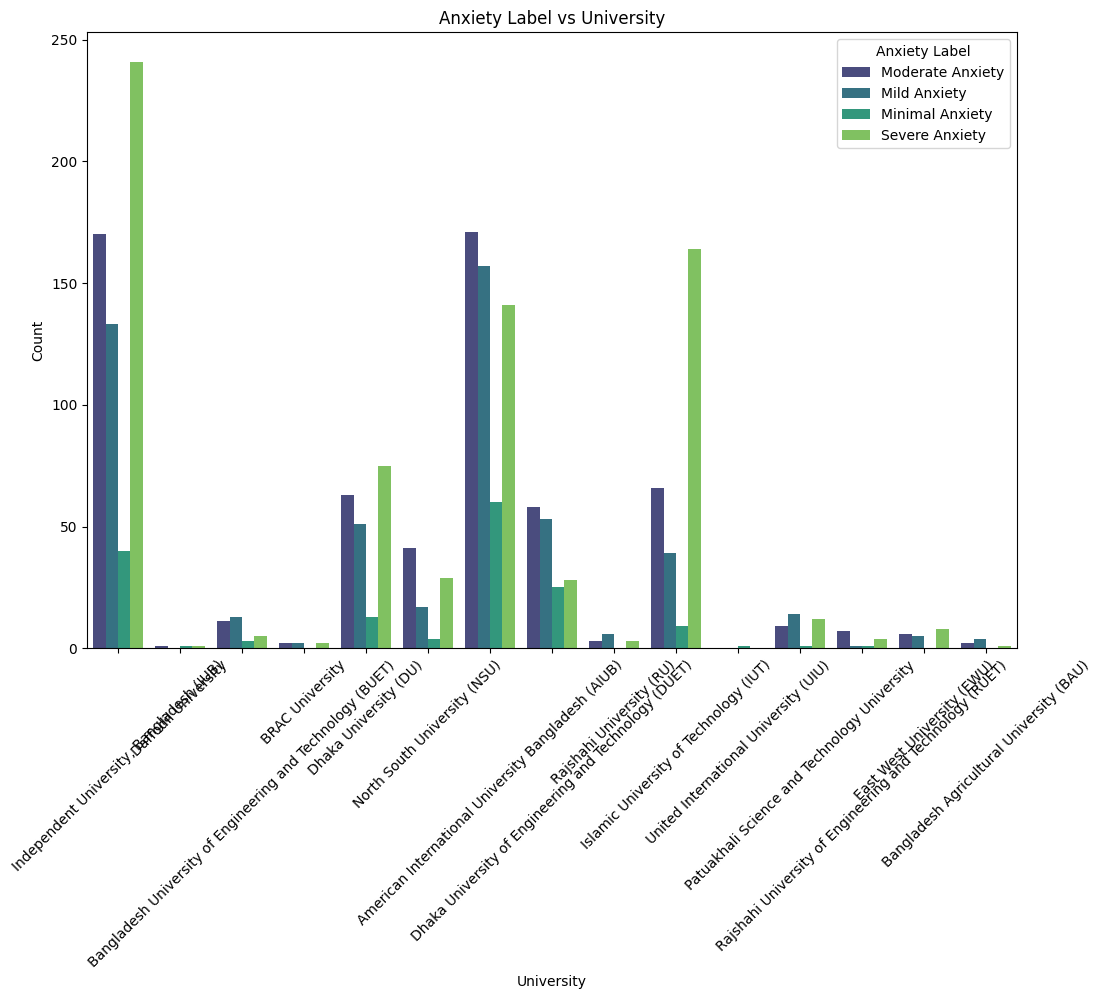

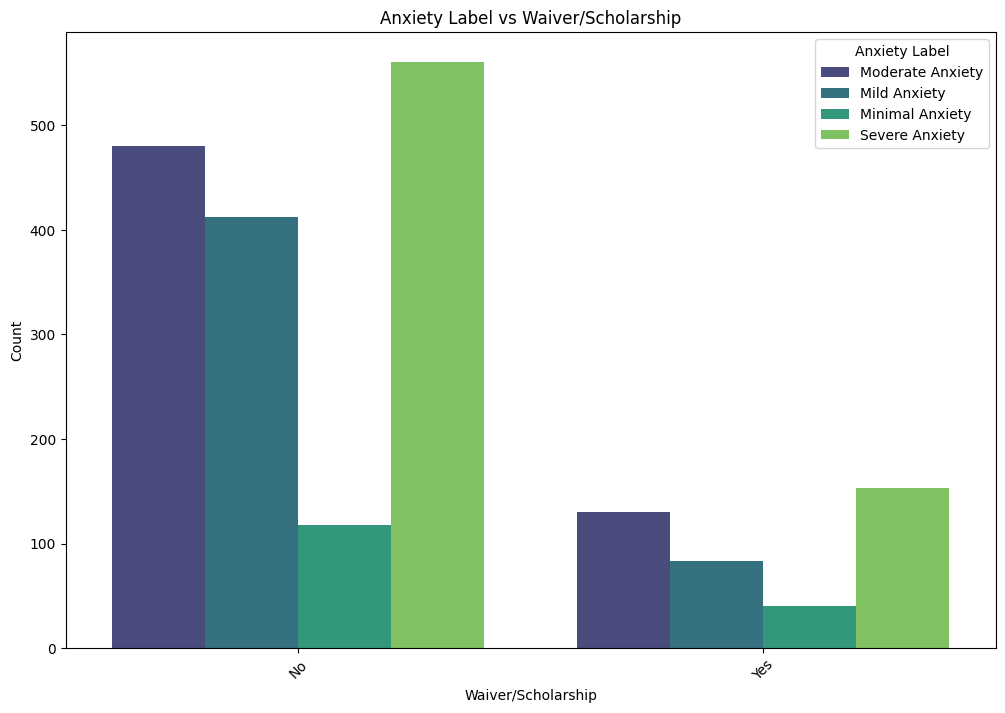


Stress Label vs Features Analysis



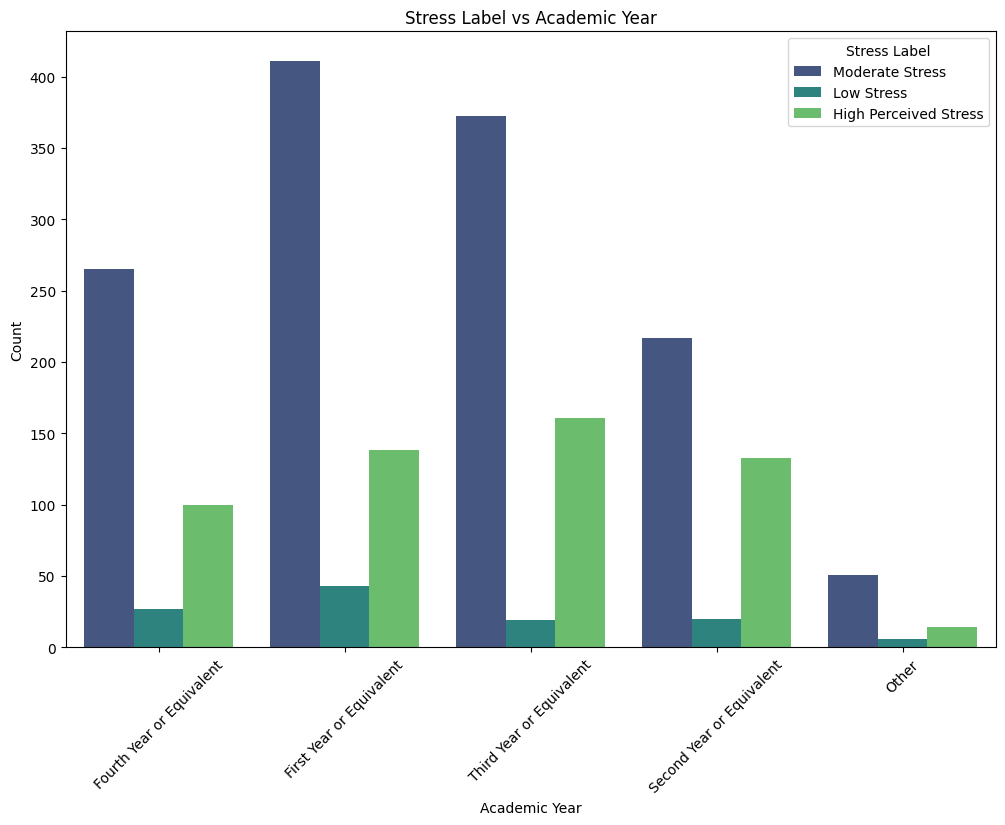

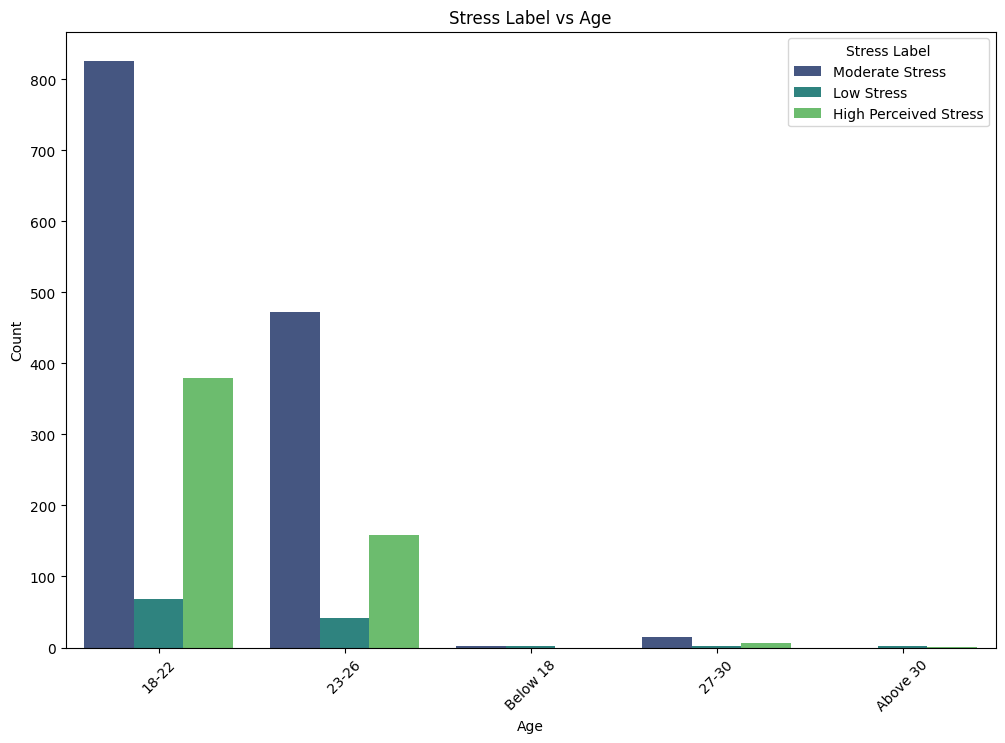

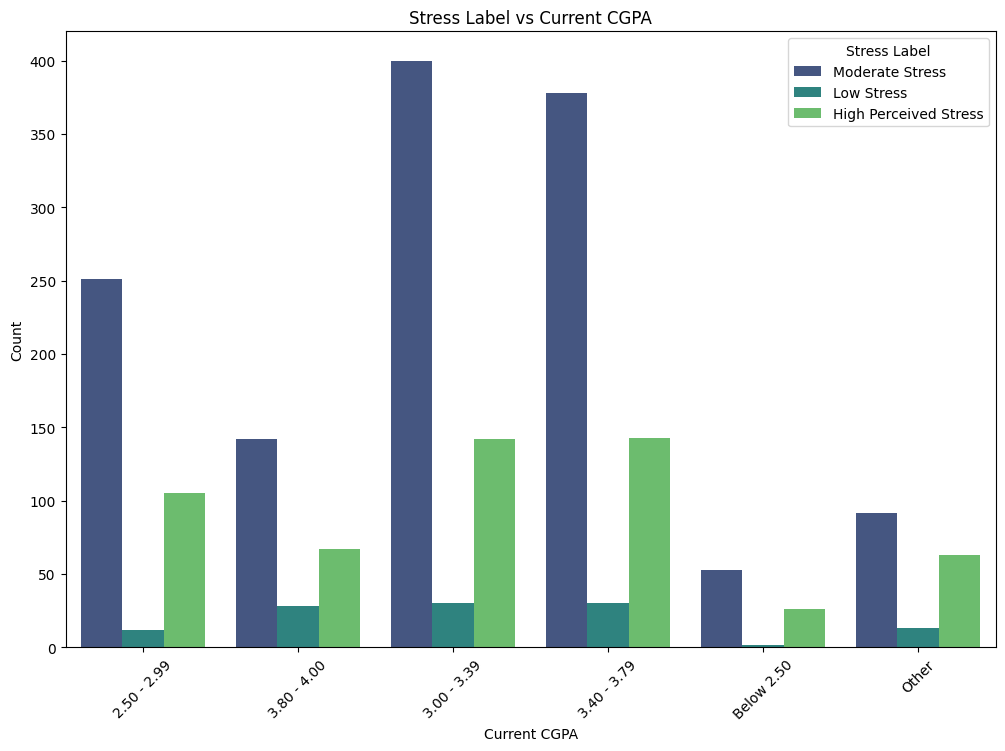

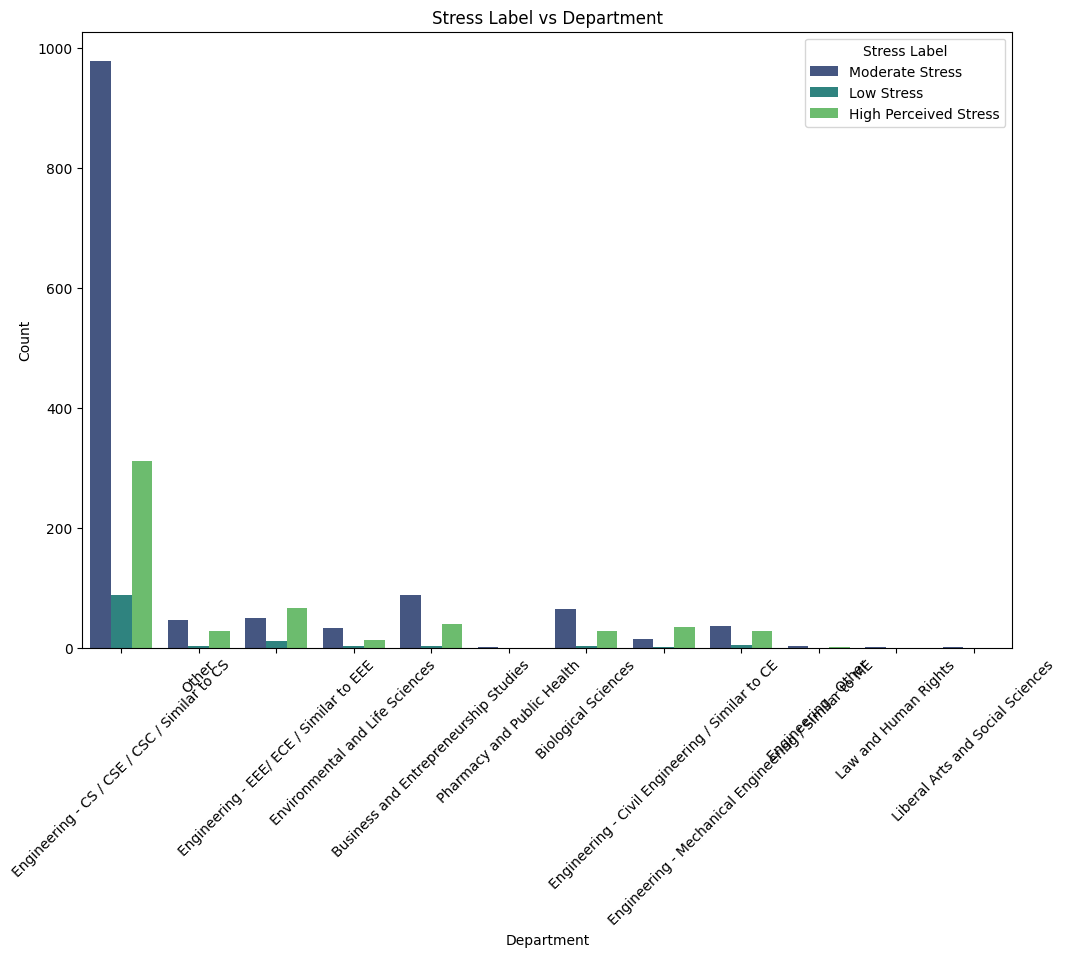

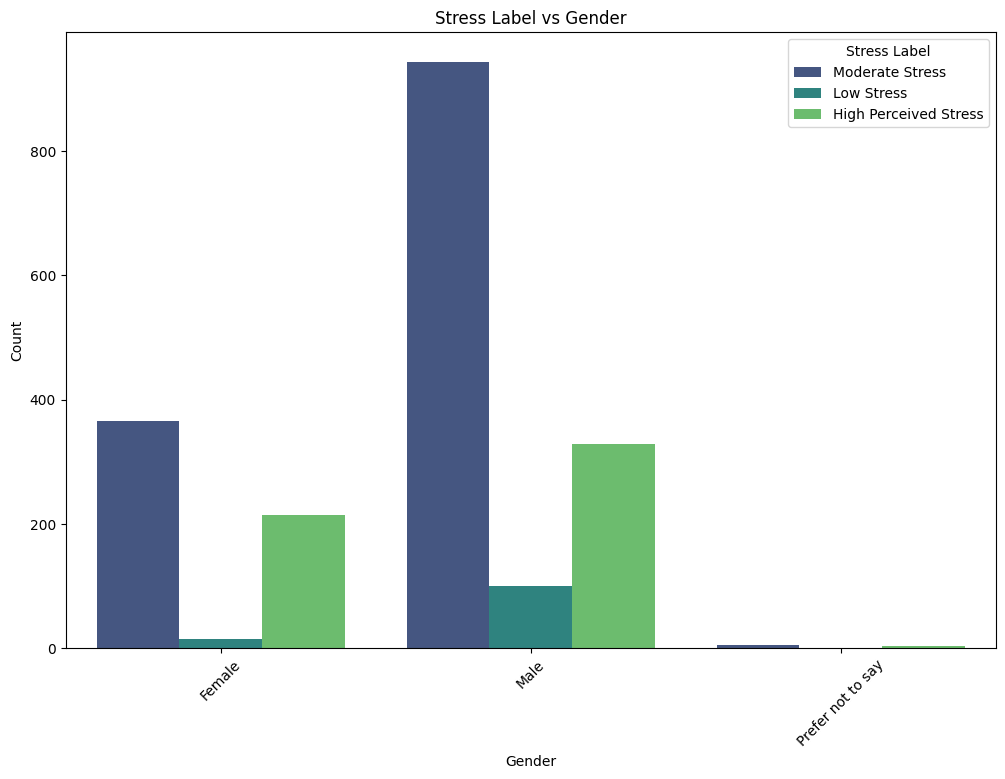

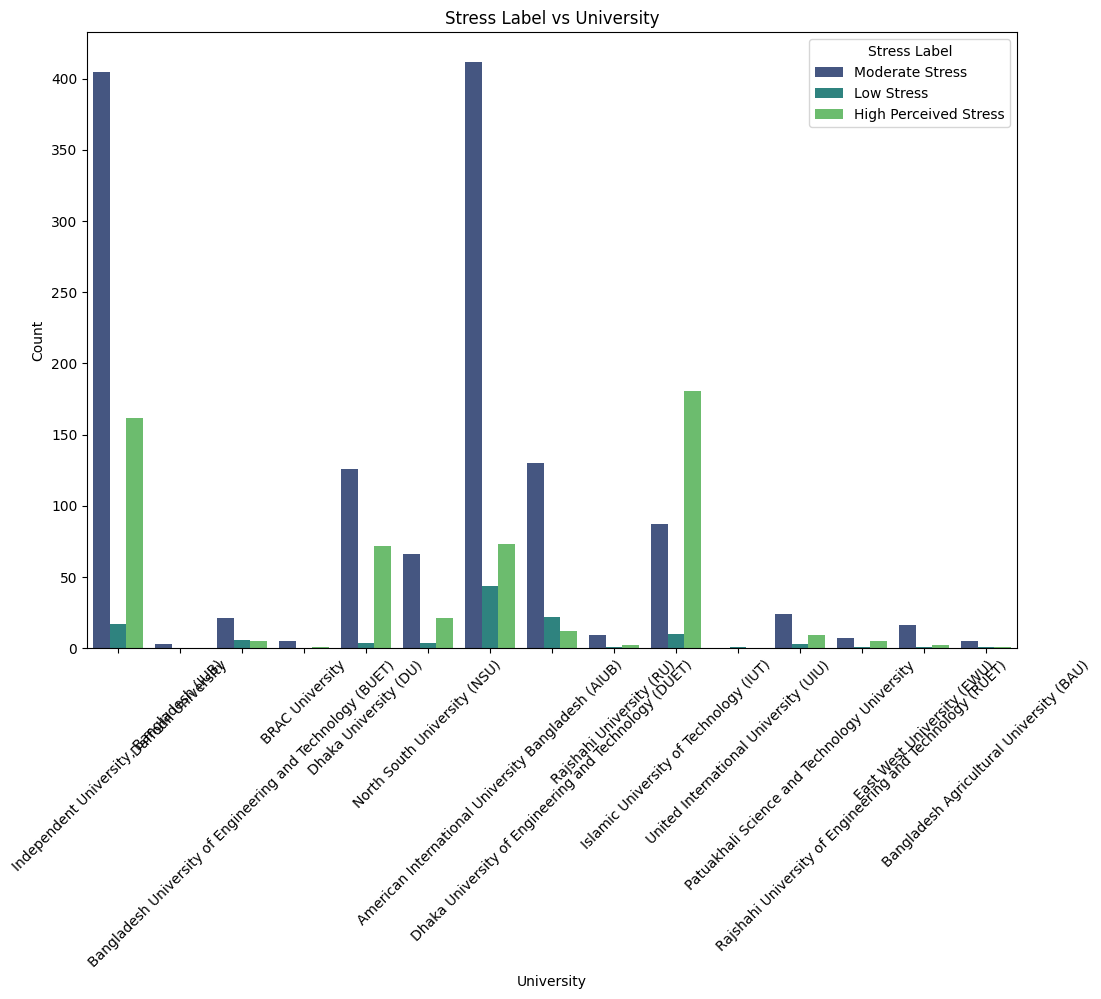

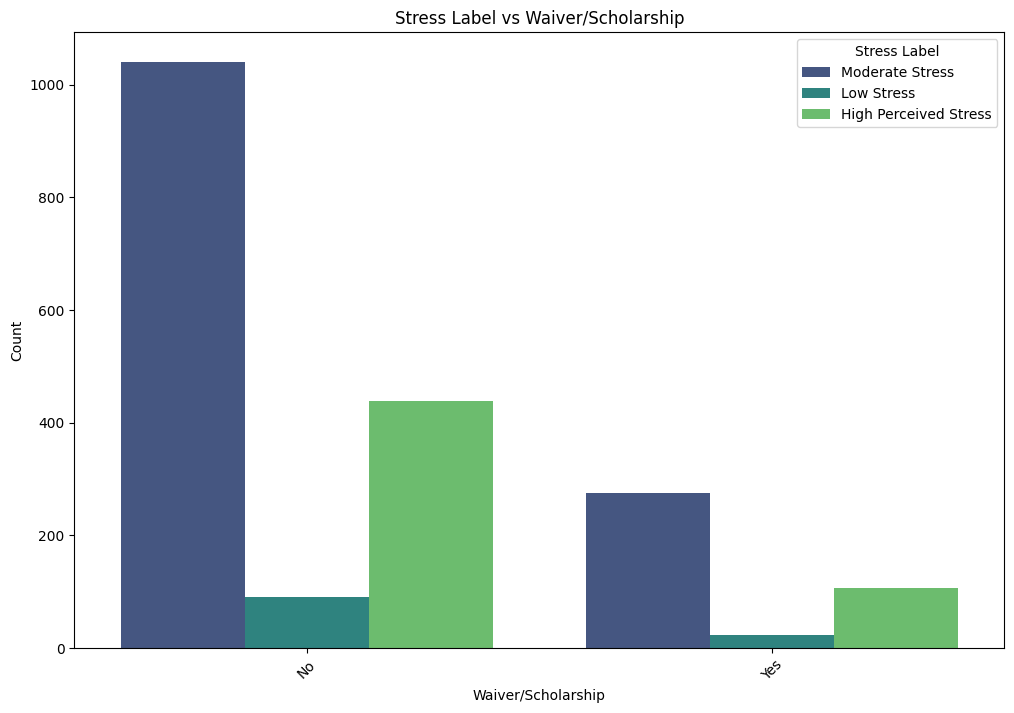


Depression Label vs Features Analysis



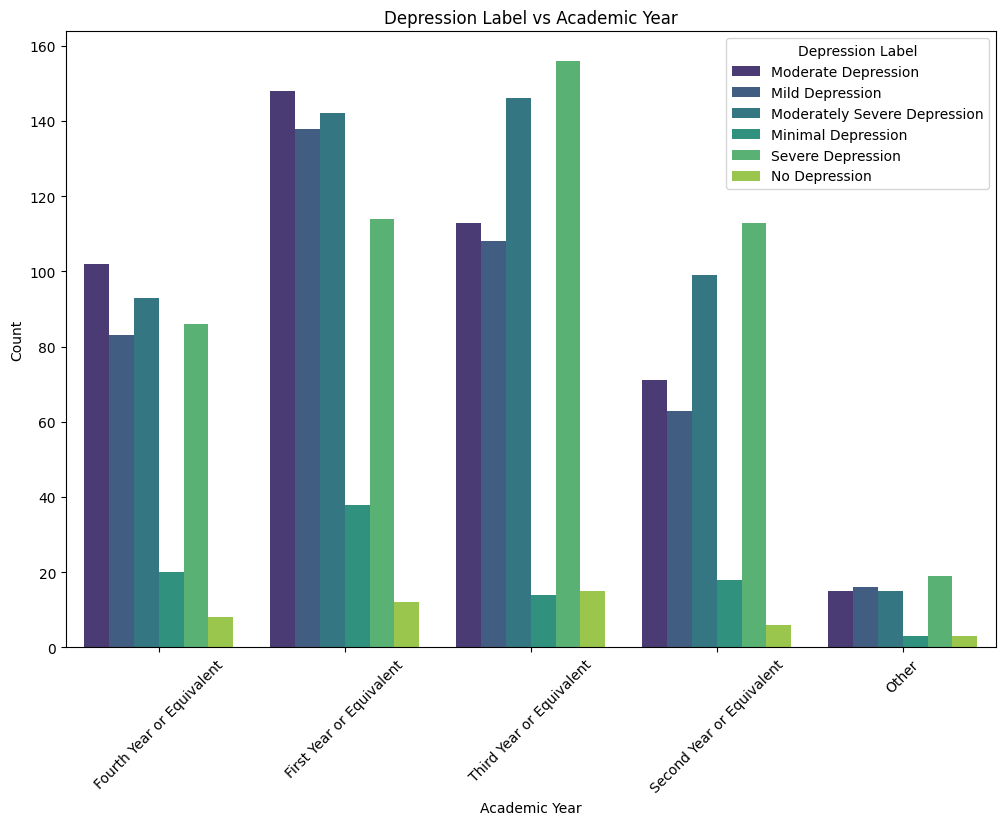

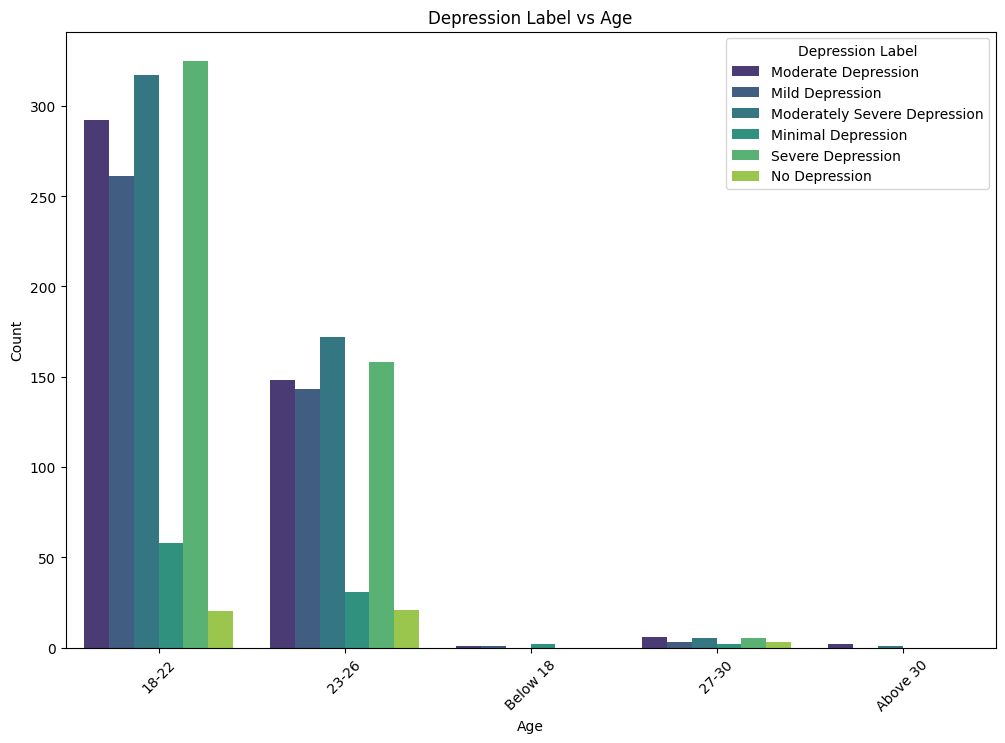

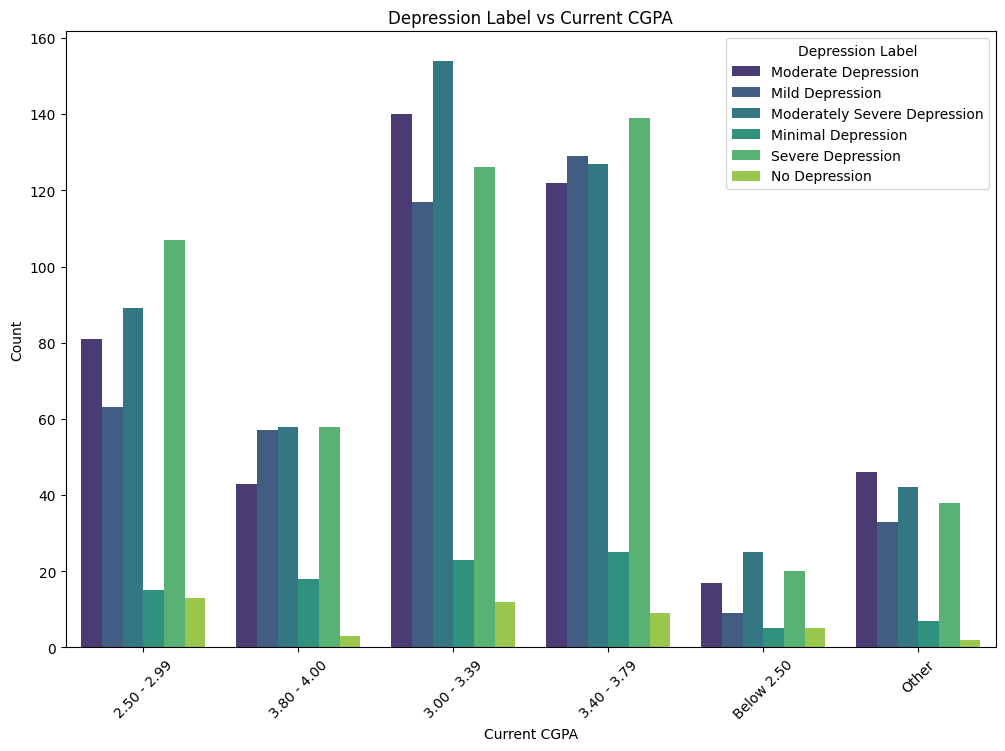

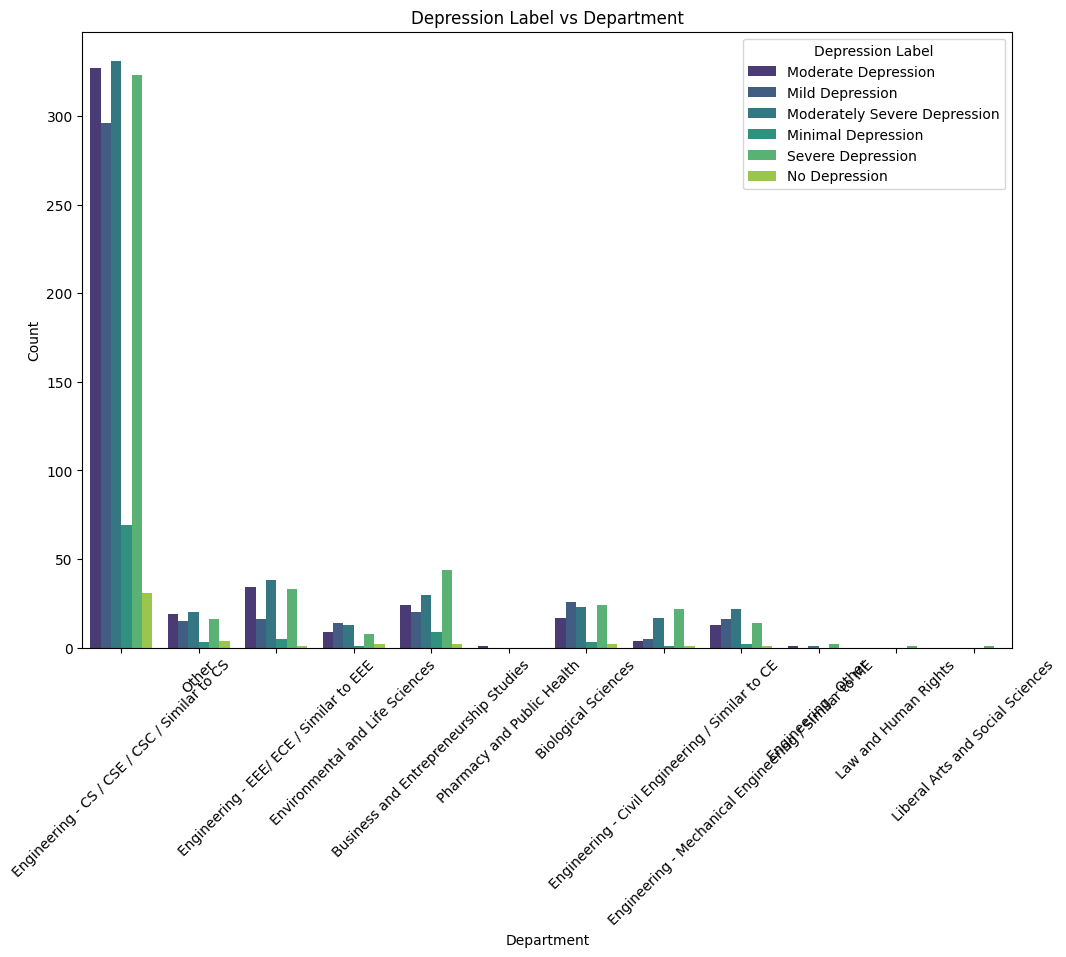

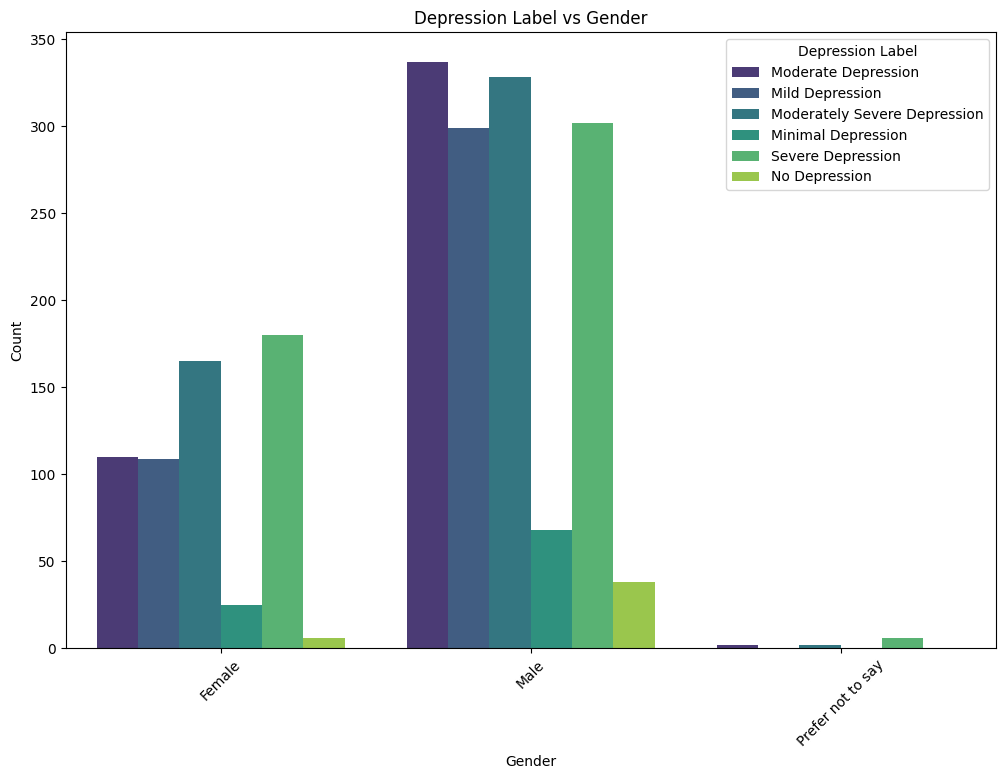

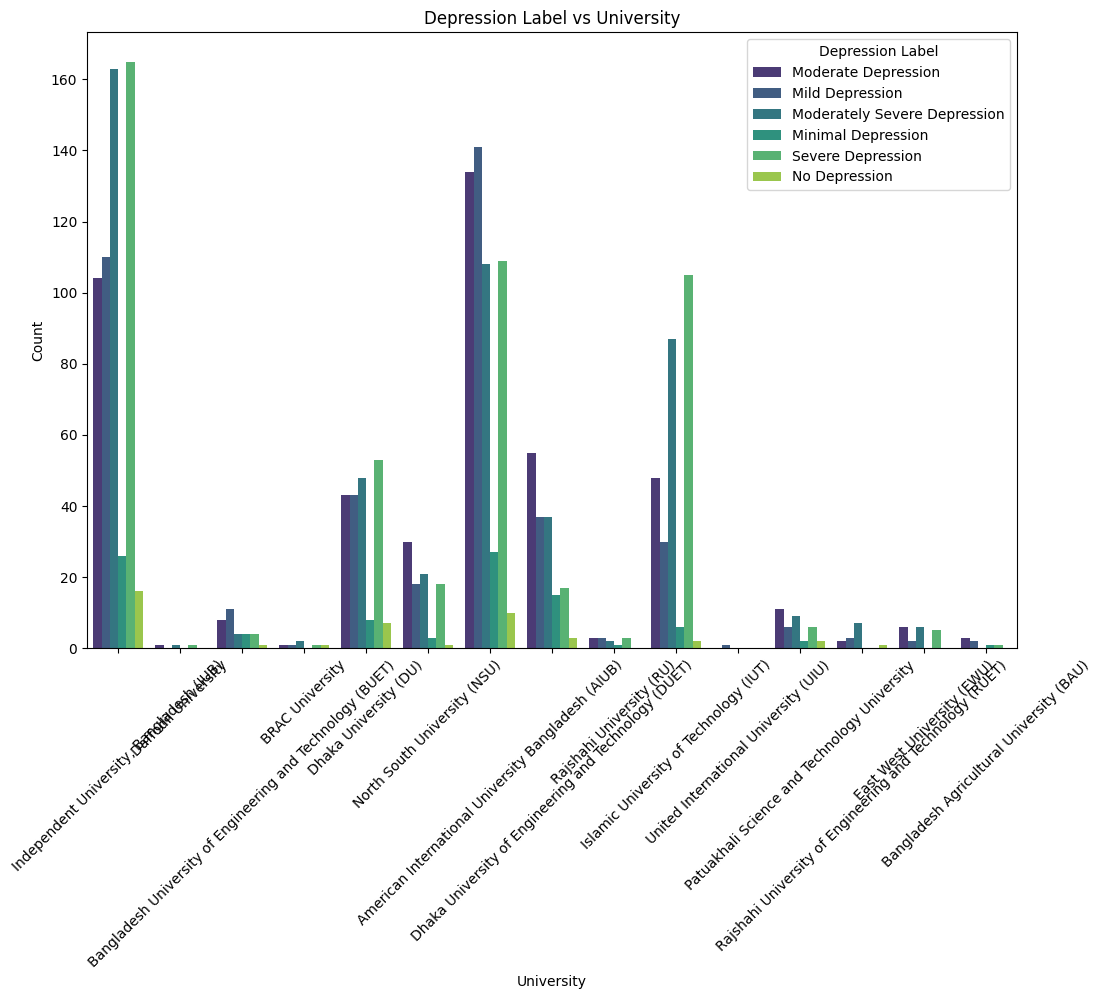

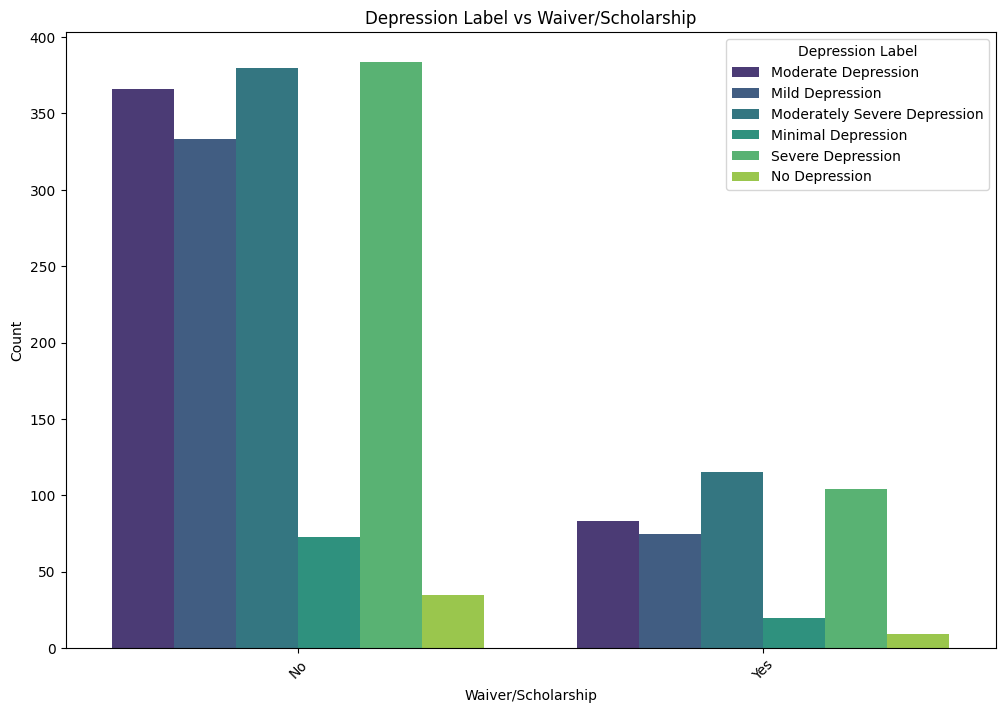

In [ ]:
# Count plots for features vs labels
feature_columns = df.columns.difference(['Anxiety Value', 'Stress Value', 'Depression Value',
                                         'Anxiety Label', 'Stress Label', 'Depression Label'])
for label_col in ['Anxiety Label', 'Stress Label', 'Depression Label']:
    print(f'\n{label_col} vs Features Analysis\n')
    for feature in feature_columns:
        plt.figure(figsize=(12, 8))
        sns.countplot(data=df, x=feature, hue=label_col, palette='viridis')
        plt.title(f'{label_col} vs {feature}')
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()

**CORRELATION ANALYSIS**

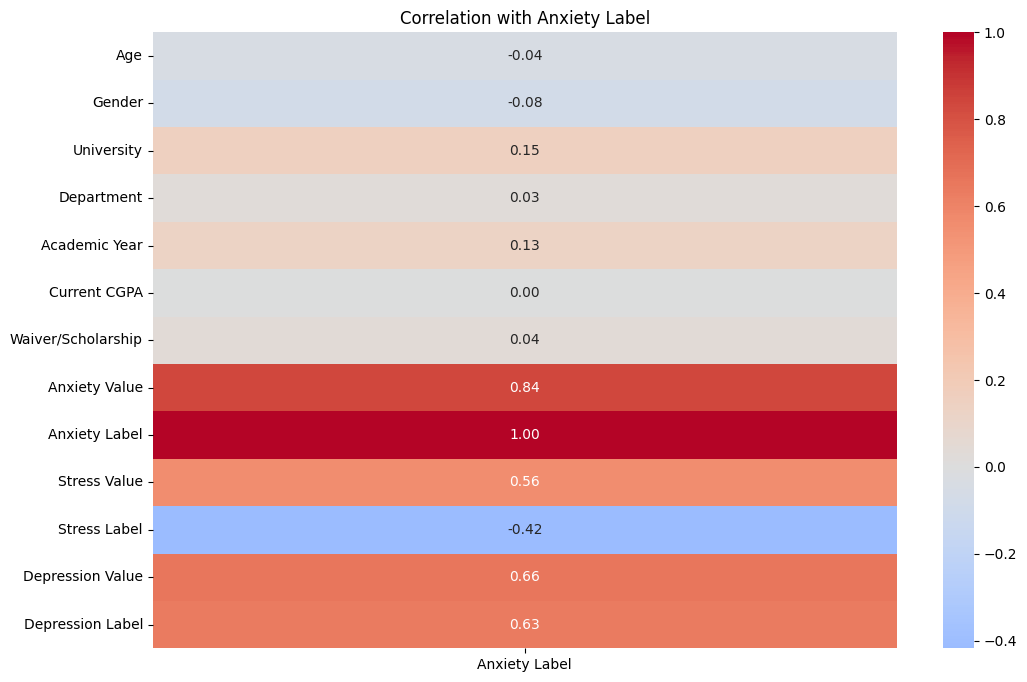

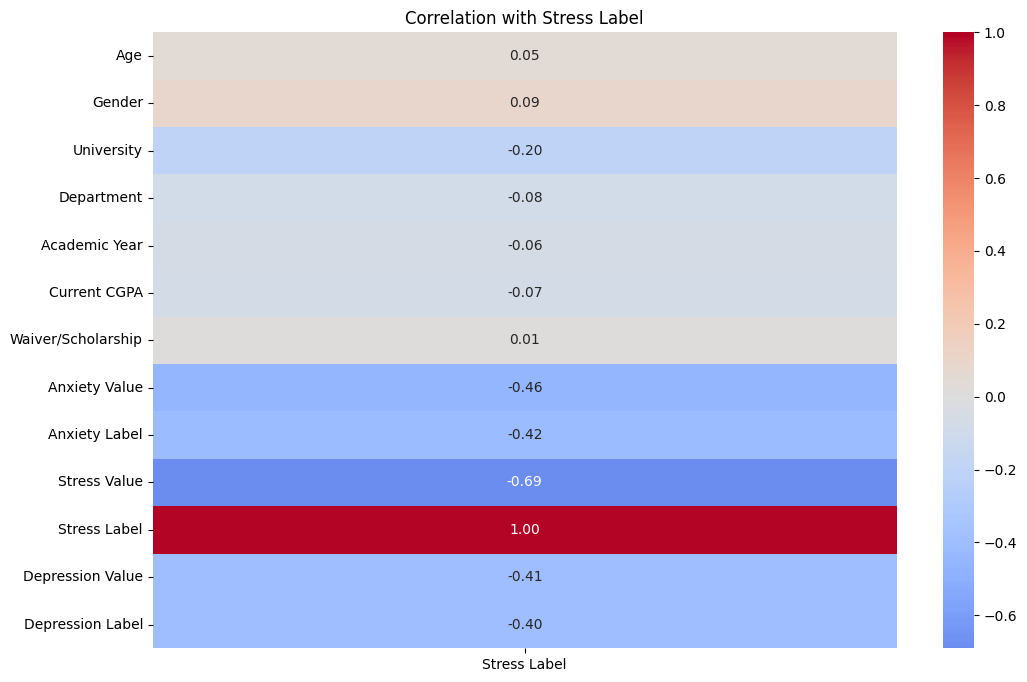

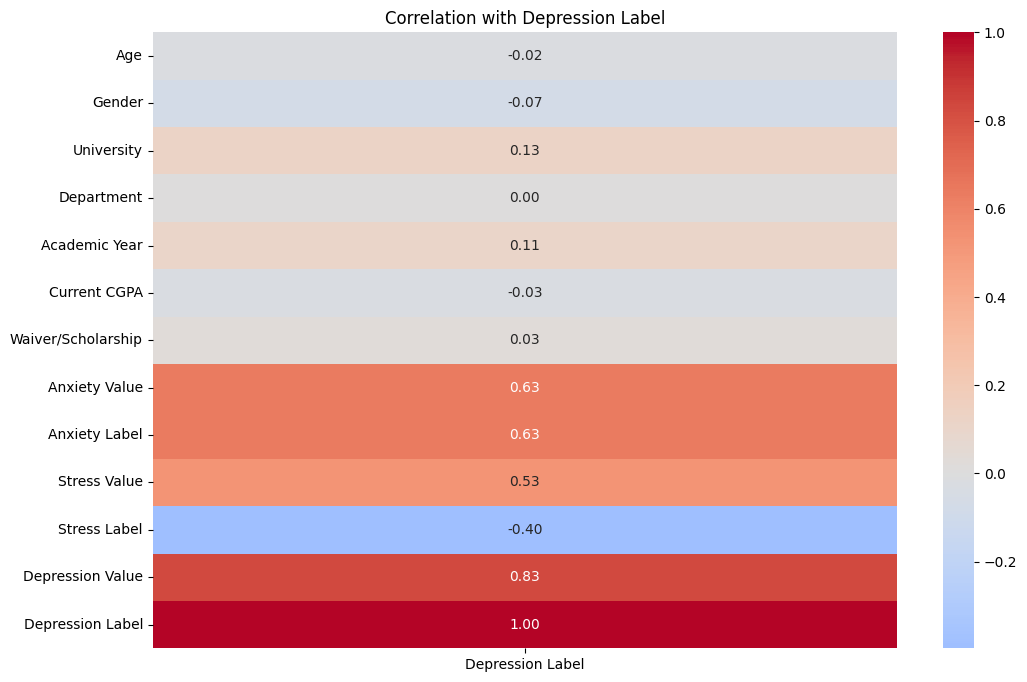

In [ ]:
# Correlation heatmaps for features vs labels
for label_col in ['Anxiety Label', 'Stress Label', 'Depression Label']:
    plt.figure(figsize=(12, 8))
    corr_matrix = df_encoded.corr()
    sns.heatmap(corr_matrix[[label_col]], annot=True, fmt='.2f', cmap='coolwarm', center=0)
    plt.title(f'Correlation with {label_col}')
    plt.show()

**MODEL TRAINING AND EVALUATION**

In [ ]:
# Encoding categorical variables for model training
df_encoded = df.copy()
label_encoder = LabelEncoder()
for column in df_encoded.columns:
    df_encoded[column] = label_encoder.fit_transform(df_encoded[column])

In [ ]:
# Model accuracy with Random Forest Classifier
print('Model Accuracy Scores with Random Forest Classifier:')
for label_col in ['Anxiety Label', 'Stress Label', 'Depression Label']:
    X = df_encoded.drop(columns=['Anxiety Label', 'Stress Label', 'Depression Label'])
    y = df_encoded[label_col]

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Random Forest model training and prediction
    rf_model = RandomForestClassifier(n_estimators=100, random_state=0)
    rf_model.fit(X_train, y_train)
    predictions = rf_model.predict(X_test)

    # Accuracy calculation
    accuracy = accuracy_score(y_test, predictions)
    print(f'{label_col}: {accuracy * 100:.2f}%')

Model Accuracy Scores with Random Forest Classifier:
Anxiety Label: 100.00%
Stress Label: 100.00%
Depression Label: 99.24%


**NEW INPUT DATA FOR PREDICTIION**

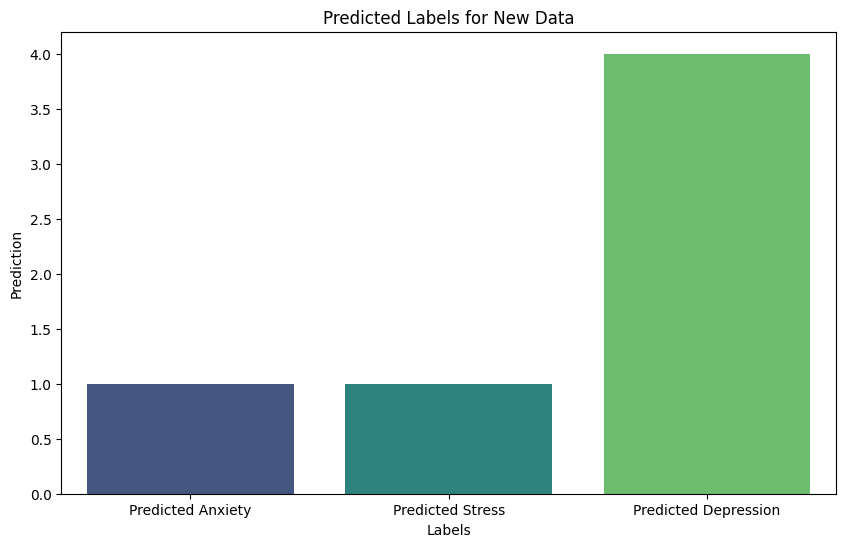

Predicted Labels:
Predicted Anxiety: 1
Predicted Stress: 1
Predicted Depression: 4


In [ ]:

# Example new data (replace this with actual new data)
new_data = pd.DataFrame({
    'Age': [18],
    'Gender': ['Female'],
    'University': ['Independent University, Bangladesh (IUB)'],
    'Department': ['Engineering - CS / CSE / CSC / Similar to CS'],
    'Academic Year': ['Fourth Year or Equivalent'],
    'Current CGPA': [2.50],

    'Nervous, Anxious or On Edge': [1],
    'Unable to Stop Worrying': [1],
    'Trouble Relaxing': [1],
    'Easily Annoyed or Irritated': [2],
    'Worried Too Much': [2],
    'Restless': [2],
    'Afraid of Something Awful': [1],
    'Upset Due to Academic Affairs': [2],
    'Unable to Control Important Things': [2],
    'Nervous and Stressed': [3],
    'Unable to Cope with Mandatory Activities': [2],
    'Confident about Handling Problems': [2],
    'Things Going Your Way': [2],
    'Control Irritations': [2],
    'Academic Performance on Top': [2],
    'Angered Due to Low Grades': [2],
    'Academic Difficulties Piling Up': [2],
    'Little Interest or Pleasure': [1],
    'Feeling Down, Depressed or Hopeless': [2],
    'Trouble Sleeping': [1],
    'Feeling Tired or Little Energy': [1],
    'Poor Appetite or Overeating': [2],
    'Feeling Bad About Yourself': [1],
    'Trouble Concentrating': [1],
    'Moved or Spoke Too Slowly': [1],
    'Thoughts of Being Better Off Dead': [1]
})

# Preprocess the new data
new_data_processed = preprocess_new_data(new_data, df_encoded.columns, label_encoder)

# Train separate SVM models for each label (replace with your actual training data and parameters)
X = df_encoded.drop(columns=['Anxiety Label', 'Stress Label', 'Depression Label'])
y_anxiety = df_encoded['Anxiety Label']
y_stress = df_encoded['Stress Label']
y_depression = df_encoded['Depression Label']

X_train_anx, X_test_anx, y_train_anx, y_test_anx = train_test_split(X, y_anxiety, test_size=0.2, random_state=0)
X_train_str, X_test_str, y_train_str, y_test_str = train_test_split(X, y_stress, test_size=0.2, random_state=0)
X_train_dep, X_test_dep, y_train_dep, y_test_dep = train_test_split(X, y_depression, test_size=0.2, random_state=0)

svm_model_anxiety = SVC(kernel='linear', random_state=0)
svm_model_stress = SVC(kernel='linear', random_state=0)
svm_model_depression = SVC(kernel='linear', random_state=0)

svm_model_anxiety.fit(X_train_anx, y_train_anx)
svm_model_stress.fit(X_train_str, y_train_str)
svm_model_depression.fit(X_train_dep, y_train_dep)

# Make predictions for each label separately
new_predictions_anxiety = svm_model_anxiety.predict(new_data_processed)
new_predictions_stress = svm_model_stress.predict(new_data_processed)
new_predictions_depression = svm_model_depression.predict(new_data_processed)

# Combine predictions into a DataFrame
predicted_labels_df = pd.DataFrame({
    'Predicted Anxiety': new_predictions_anxiety,
    'Predicted Stress': new_predictions_stress,
    'Predicted Depression': new_predictions_depression
}, index=[0]) # Use index=[0] to indicate a single data point

# Visualize the predicted labels for the new data
predicted_labels = predicted_labels_df.iloc[0]  # Get the predictions for the single data point

# Plotting the predictions as a bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x=predicted_labels.index, y=predicted_labels.values, palette='viridis')
plt.title('Predicted Labels for New Data')
plt.xlabel('Labels')
plt.ylabel('Prediction')
plt.show()

# Displaying the predicted labels for clarity
print('Predicted Labels:')
for label, prediction in zip(predicted_labels.index, predicted_labels):
    print(f'{label}: {prediction}')
